<a href="https://colab.research.google.com/github/itsmevidhyak/Trippy/blob/master/03_Shapes_and_Multivariate_Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shapes and Multivariate Distributions

Shape semantics defines the vectorisation of distributions of different tensor dimensions.

In [1]:
# Import packages
import collections
import matplotlib.pyplot as plt
from __future__ import print_function

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

try:
  import tensorflow.compat.v2 as tf
except Exception:
  pass

tf.enable_v2_behavior()
print(tf.__version__)
print(tfp.__version__)

TensorFlow 2.x selected.
2.0.0
0.9.0-dev20191201


**Unpacking Shape**

Tensor shapes are partitioned into three groups: <br>
1. **Sample Shape** - iid draws from the distribution
2. **Batch Shape** - independent but not identical draws from the distribution 
3. **Event Shape** - single draw (event space) from the distribution 

$[ { \ \underbrace {\textit{n} \texttt { Monte Carlo draws}}_\texttt{sample_shape} \\ \texttt {  (iid distributed)}}\ , { \ \underbrace {\textit{b} \texttt{ examples per batch}}_\texttt{batch_shape} \\ \texttt{(indep, not identical)}},{ \ \underbrace {\textit{s} \texttt{ latent dimensions}}_\texttt{event_shape} \\ \texttt{(can be dependent)}}$ 

Some examples: <br>
Sample shape - iid draws from the distribution

In [2]:
# Instantiate a Normal Distribution
gaussian = tfd.Normal(loc = 3.0, scale = 5.0)

# Sampling from the above Normal distribution
gaussian.sample(5)  # Returns a sample shape(5, )

<tf.Tensor: id=22, shape=(5,), dtype=float32, numpy=
array([ 9.829307 ,  1.0951884, -0.0320797, 10.16184  ,  2.205355 ],
      dtype=float32)>

In [3]:
gaussian.sample(15)  # Returns a sample shape(15, )

<tf.Tensor: id=43, shape=(15,), dtype=float32, numpy=
array([ 4.539491  ,  6.3210697 ,  7.771464  ,  0.14339638, -0.40450788,
        0.80200505, -0.43308973, -1.7383051 ,  0.5661471 ,  9.27014   ,
        3.4292607 ,  0.25244522,  4.387712  ,  4.0290074 ,  1.9813088 ],
      dtype=float32)>

Batch shape - It is not the dimensionality of the distribution (for example, a multivariate normal with 2 dimensions $X \in \mathbb{R}^2$). These are draws from different distributions. <br>
Let us draw samples from the below 3 independent normal distributions - <br>
$x_1 \sim N(\mu = -7, \sigma = 4)$ <br>
$x_2 \sim N(\mu = 2, \sigma = 3)$ <br>
$x_3 \sim N(\mu = 20, \sigma = 7)$ 

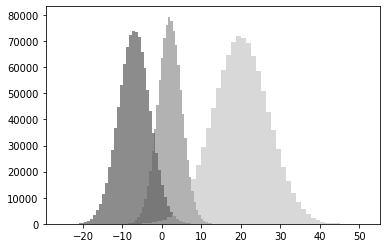

In [4]:
# Instantiate 3 different univariate Normal distributions
x1, x2, x3 = [tfd.Normal(loc = -7.0, scale = 4.0),
              tfd.Normal(loc = 2.0, scale = 3.0),
              tfd.Normal(loc = 20.0, scale = 7.0)]

# Draw samples and plot them
plt.hist(x1.sample(1000000), color="0.1", alpha=0.5, bins=50)
plt.hist(x2.sample(1000000), color="0.4", alpha=0.5, bins=50)
plt.hist(x3.sample(1000000), color='0.7', alpha=0.5, bins=50)
plt.show()

Let us try the same using batch_shape.

In [5]:
# Use batch shape to instantiate 3 different Normal distributions
mixtures = tfd.Normal(loc = [-7.0, 2.0, 20.0], scale = [4.0, 3.0, 7.0])
mixtures

<tfp.distributions.Normal 'Normal' batch_shape=[3] event_shape=[] dtype=float32>

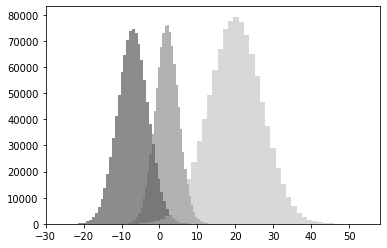

In [6]:
# Draw samples and plot them
plt.hist(mixtures[0].sample(1000000), color="0.1", alpha=0.5, bins=50)
plt.hist(mixtures[1].sample(1000000), color="0.4", alpha=0.5, bins=50)
plt.hist(mixtures[2].sample(1000000), color='0.7', alpha=0.5, bins=50)
plt.show()

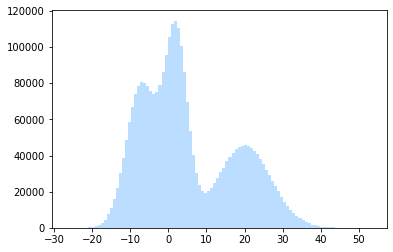

In [7]:
# Samples from mixtures inside a contiguous array and plot results
plt.hist(mixtures.sample(1000000).numpy().ravel(), bins=100,
         color = 'dodgerblue', alpha=0.3)
plt.show()

Let us compare the shapes. For example 3 samples from x1, x2 or x3 all have the same shape = (3, ) and draws from the "mixtures" model includes a batch dimension (3, 3):

In [8]:
# shape of x1
x1.sample(3)

<tf.Tensor: id=423, shape=(3,), dtype=float32, numpy=array([-2.5832667, -6.565972 , -5.5897484], dtype=float32)>

In [9]:
# shape of mixtures
mixtures.sample(3)

<tf.Tensor: id=444, shape=(3, 3), dtype=float32, numpy=
array([[-6.94968   ,  0.7726462 , 26.47045   ],
       [-9.246223  ,  1.5750608 , 24.0219    ],
       [-9.243377  , -0.32097912, 21.823883  ]], dtype=float32)>

**Multivariate Distributions**

The mixture distribution above is *not the same as the multivariate normal distribution* in dimension $\mathbb{R}^3$. The mixture distribution is a batch of 3 independent gaussians.

Let us simulate from a Multivariate Normal Distribution and understand the difference between a mixture distribution of 3 different gaussians and a multivariate normal distribution of similar location and scale parameters.

In [14]:
# Instantiate a Multivariate Normal distribution
mvt_Normal = tfd.MultivariateNormalDiag(loc = [-7.0, 2.0, 20.0], 
                                        scale_diag = [4.0, 3.0, 7.0])
mvt_Normal

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[] event_shape=[3] dtype=float32>

We can see above that the Multivariate Normal Distribution has an event_shape with 3 latent dimensions.

In [0]:
# tfp Multivariate normal distribution throws following error in colab
# TypeError: Tensor is unhashable if Tensor equality is enabled 
# To resolve it uncomment below and upgrade nightly
# pip install --upgrade tf-nightly-gpu-2.0-preview tfp-nightly

In [20]:
mvt_Normal.sample(4)

<tf.Tensor: id=688, shape=(4, 3), dtype=float32, numpy=
array([[-9.760804 ,  4.1383586, 13.093494 ],
       [-8.02671  ,  6.436717 , 13.805077 ],
       [-7.1317725,  5.980997 , 17.372684 ],
       [-4.4313264, -1.4023175, 22.263996 ]], dtype=float32)>

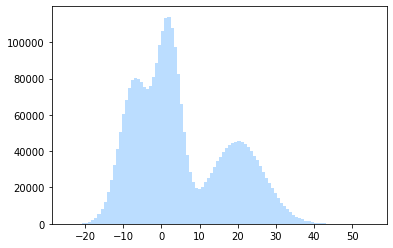

In [16]:
# Samples from mvt_Normal inside a contiguous array and plot results
plt.hist(mvt_Normal.sample(1000000).numpy().ravel(), bins=100,
         color = 'dodgerblue', alpha=0.3)
plt.show()

This resembles the mixture distribution we generated above except that the above is a Multivariate Normal Distribution in reality with 0 covariance between the dimensions. 

We can now simulate a multivariate normal distribution with a full covariance matrix structure in place.

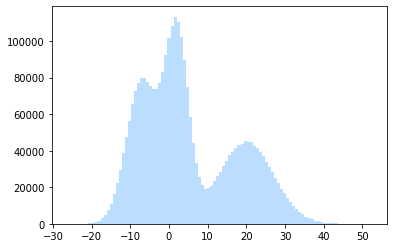

In [37]:
# Simulating a Multivariate normal distribution with full covariance matrix
covariance_matrix = [[4.0**2, 0.12, 15.0],
                     [0.12, 3.0**2, -12.0],
                     [15.0, -12.0, 7.0**2]]
scale = tf.linalg.cholesky(covariance_matrix)
mvn = tfd.MultivariateNormalTriL(loc = [-7.0, 2.0, 20.0], scale_tril = scale)

# Sample from the above distribution and plot the results
plt.hist(mvn.sample(1000000).numpy().ravel(), bins = 100, \
         color = "dodgerblue", alpha = 0.3)
plt.show()                                                                

The plot resembles the previous plot. Here, we are observing the variance within each dimension (the diagonal of the covariance matrix) but we aren't able to observe the covariance structure. We can see this with a pairs plot:

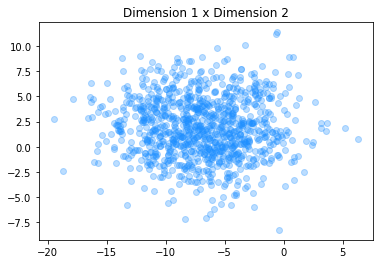

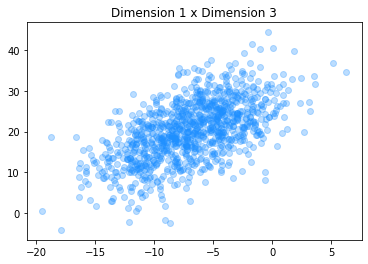

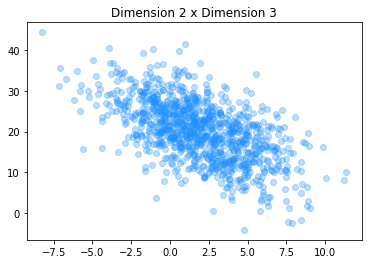

In [38]:
# Simulate samples from mvn
simulated_values = mvn.sample(1000).numpy()

# Plotting correlation structures between possible combinations of dimensions
for i in [0, 1]:
  for j in [1, 2]:
    if i!=j:
      plt.scatter(simulated_values[:,i], simulated_values[:,j], 
                  color = 'dodgerblue', alpha = 0.3)
      plt.title("Dimension {} x Dimension {}" .format(i+1, j+1))
      plt.show()

As expected, we can see weaker correlation between dimension 1 and 2, strong positive correlation between dimension 1 and 3 and strong negative correlation between dimension 2 and 3.

Let us try one more example that resembles an iris dataset  - simulations from a multivariate normal distrubtion with the same mean and covariance structure.

(150, 3, 2)


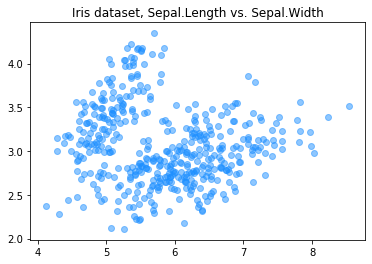

In [60]:
# Sample location and covariance structure
mu = [[5, 3.4], [5.9, 2.77], [6.58, 2.97]]
cov = [[[0.123, 0.099], [0.099, 0.143]],
      [[0.266, 0.085], [0.085, 0.098]],
      [[0.404, 0.0937], [0.0937, 0.104]]]
scale = tf.linalg.cholesky(cov)

# Instantiate Multivariate Normal distribution with above covariance structure
mvn = tfd.MultivariateNormalTriL(
  loc = mu,
  scale_tril = scale
)

# Sample from the above distribution and plot the results
simulated_values = mvn.sample(150)
print(simulated_values.shape)

plt.scatter(simulated_values.numpy()[:,:,0], simulated_values.numpy()[:,:,1], 
         color="dodgerblue", alpha=0.5)
plt.title("Iris dataset, Sepal.Length vs. Sepal.Width")
plt.show()

The shape of our simulation shows what we have done here, which is to simulate 150 draws from a 2-dimensional multivariate. And we have done this 3 times, where each of these are indepedent 2-D MVNs, one for each of the three species of iris.